In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/regression 3/regression/melbourne housing market/MELBOURNE_HOUSE_PRICES_LESS.xlsx')

In [ ]:
df2 = pd.read_excel('/content/drive/MyDrive/regression 3/regression/melbourne housing market/Melbourne_housing_FULL.xlsx')

In [ ]:
df1.shape

(63023, 13)

In [ ]:
df2.shape

(34857, 21)

In [ ]:
df1.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,2017-01-04 00:00:00,3067,Northern Metropolitan,4019.0,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,2017-01-04 00:00:00,3067,Northern Metropolitan,4019.0,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,2017-01-04 00:00:00,3067,Northern Metropolitan,4019.0,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,2017-01-04 00:00:00,3040,Western Metropolitan,1543.0,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,2017-01-04 00:00:00,3042,Western Metropolitan,3464.0,10.4,Moonee Valley City Council


In [ ]:
df2.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,2016-03-09 00:00:00,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-03-12 00:00:00,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-04-02 00:00:00,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,NaN
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,2016-04-02 00:00:00,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-04-03 00:00:00,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [ ]:
df = pd.merge(df1,df2, how = 'outer')

In [ ]:
df.shape

(76886, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76886 entries, 0 to 76885
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         76886 non-null  object 
 1   Address        76886 non-null  object 
 2   Rooms          76886 non-null  int64  
 3   Type           76886 non-null  object 
 4   Price          59228 non-null  float64
 5   Method         76886 non-null  object 
 6   SellerG        76883 non-null  object 
 7   Date           76886 non-null  object 
 8   Postcode       76885 non-null  float64
 9   Regionname     76881 non-null  object 
 10  Propertycount  76872 non-null  float64
 11  Distance       76885 non-null  float64
 12  CouncilArea    76874 non-null  object 
 13  Bedroom2       26642 non-null  float64
 14  Bathroom       26633 non-null  float64
 15  Car            26131 non-null  float64
 16  Landsize       23049 non-null  float64
 17  BuildingArea   13744 non-null  float64
 18  YearBu

In [ ]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            17658
Method               0
SellerG              3
Date                 0
Postcode             1
Regionname           5
Propertycount       14
Distance             1
CouncilArea         12
Bedroom2         50244
Bathroom         50253
Car              50755
Landsize         53837
BuildingArea     63142
YearBuilt        61333
Lattitude        50003
Longtitude       50003
dtype: int64

In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Postcode', 'Regionname', 'Propertycount', 'Distance',
       'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude'],
      dtype='object')

In [ ]:
categorical_list=['Regionname','CouncilArea','Suburb','Address','Type','Method','SellerG','Date']

In [ ]:
for i in categorical_list:
  df[i]=df[i].astype('category').cat.codes 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76886 entries, 0 to 76885
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         76886 non-null  int16  
 1   Address        76886 non-null  int32  
 2   Rooms          76886 non-null  int64  
 3   Type           76886 non-null  int8   
 4   Price          59228 non-null  float64
 5   Method         76886 non-null  int8   
 6   SellerG        76886 non-null  int16  
 7   Date           76886 non-null  int8   
 8   Postcode       76885 non-null  float64
 9   Regionname     76886 non-null  int8   
 10  Propertycount  76872 non-null  float64
 11  Distance       76885 non-null  float64
 12  CouncilArea    76886 non-null  int8   
 13  Bedroom2       26642 non-null  float64
 14  Bathroom       26633 non-null  float64
 15  Car            26131 non-null  float64
 16  Landsize       23049 non-null  float64
 17  BuildingArea   13744 non-null  float64
 18  YearBu

In [ ]:
df['Price'] = df['Price'].fillna(df['Price'].median())
df['SellerG'] = df['SellerG'].fillna(df['SellerG'].median())
df['Postcode'] = df['Postcode'].fillna(df['Postcode'].median())
df['Regionname'] = df['Regionname'].fillna(df['Regionname'].median())
df['Propertycount'] = df['Propertycount'].fillna(df['Propertycount'].median())
df['Distance'] = df['Distance'].fillna(df['Distance'].median())
df['CouncilArea'] = df['CouncilArea'].fillna(df['CouncilArea'].median())
df['Bedroom2'] = df['Bedroom2'].fillna(df['Bedroom2'].median())
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].median())
df['Car'] = df['Car'].fillna(df['Car'].median())
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].median())
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].median())
df['YearBuilt'] = df['YearBuilt'].fillna(df['YearBuilt'].median())
df['Lattitude'] = df['Lattitude'].fillna(df['Lattitude'].median())
df['Longtitude'] = df['Longtitude'].fillna(df['Longtitude'].median())

In [ ]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Postcode         0
Regionname       0
Propertycount    0
Distance         0
CouncilArea      0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Lattitude        0
Longtitude       0
dtype: int64

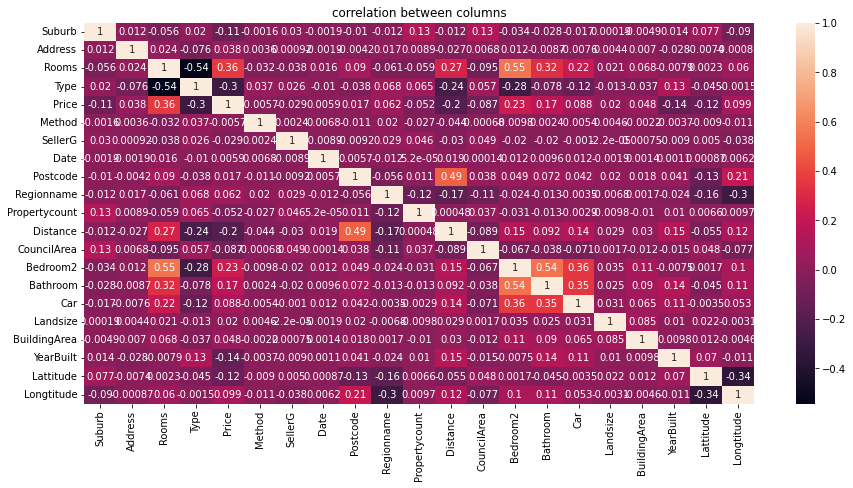

In [ ]:
# Checking the correlation
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True)
plt.title('correlation between columns')
plt.show()

In [ ]:

# Split the dataset into training and testing sets
train_data, test_data = np.split(df.sample(frac=1, random_state=42), [int(0.8 * len(df))])

# Define the input features and target variable
X_train = train_data.drop([ "Price"], axis=1)
y_train = train_data["Price"]
X_test = test_data.drop([ "Price"], axis=1)
y_test = test_data["Price"]

# Define a function to calculate the mean squared error
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Define a function to split the data based on a given feature and threshold value
def split_data(X, y, feature, threshold):
    left_mask = X[feature] <= threshold
    right_mask = X[feature] > threshold
    X_left, y_left = X.loc[left_mask], y.loc[left_mask]
    X_right, y_right = X.loc[right_mask], y.loc[right_mask]
    return X_left, y_left, X_right, y_right

# Define a function to find the best split point for a given feature
def find_best_split(X, y, feature):
    # Sort the data by the feature
    X_sorted = X.sort_values(feature)
    y_sorted = y[X_sorted.index]
    # Initialize the best split point and lowest mse
    best_split = None
    lowest_mse = float("inf")
    # Loop through each unique value of the feature
    for threshold in X_sorted[feature].unique():
        # Split the data at the current threshold
        X_left, y_left, X_right, y_right = split_data(X_sorted, y_sorted, feature, threshold)
        # Calculate the mse for the current split
        mse = mean_squared_error(y_left, y_left.mean()) + mean_squared_error(y_right, y_right.mean())
        # Update the best split and lowest mse if the current mse is lower
        if mse < lowest_mse:
            best_split = (feature, threshold)
            lowest_mse = mse
    return best_split, lowest_mse

In [ ]:
# Define a class for decision tree nodes
class Node:
    def __init__(self, X, y, depth=0, max_depth=5, min_samples_split=2):
        self.X = X
        self.y = y
        self.depth = depth
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.left = None
        self.right = None
        self.split_feature = None
        self.split_threshold = None
        self.prediction = y.mean()
        # Stop splitting if the node reaches the maximum depth or minimum number of samples
        if depth < max_depth and len(X) >= min_samples_split:
            # Find the best split point among all features
            best_split, lowest_mse = min([find_best_split(X, y, feature) for feature in X.columns], key=lambda x: x[1])
            # Create left and right child nodes and continue splitting recursively
            if best_split is not None:
                self.split_feature, self.split_threshold = best_split
                X_left, y_left, X_right, y_right = split_data(X, y, self.split_feature, self.split_threshold)
                self.left = Node(X_left, y_left, depth+1, max_depth, min_samples_split)
                self.right = Node(X_right, y_right, depth+1, max_depth, min_samples_split)
                self.prediction = None

    def predict_row(self, row):
        # Recursively traverse the tree to find the prediction for a given row
        if self.prediction is not None:
            return self.prediction
        elif row[self.split_feature] <= self.split_threshold:
            return self.left.predict_row(row)
        else:
            return self.right.predict_row(row)

    def predict(self, X):
        # Make predictions for all rows in X
        return np.array([self.predict_row(X.iloc[i]) for i in range(len(X))])

# Train the decision tree on the training data
tree = Node(X_train, y_train)

# Make predictions on the testing data
y_pred = tree.predict(X_test)



In [ ]:
# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 274746872209.2528


In [ ]:
y_pred

array([974474.84166626, 974474.84166626, 974474.84166626, ...,
       974474.84166626, 974474.84166626, 974474.84166626])

In [ ]:
pred_df = pd.DataFrame({'Price':y_pred})

In [ ]:
pred_df.head()

,Price
0,974474.841666
1,974474.841666
2,974474.841666
3,974474.841666
4,974474.841666


In [ ]:
print("Predicted values:", y_pred)
print("Actual values:", y_test.values)

Predicted values: [974474.84166626 974474.84166626 974474.84166626 ... 974474.84166626
 974474.84166626 974474.84166626]
Actual values: [825000. 930000. 845000. ... 660000. 500000. 845000.]
